In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [29]:
K = 1000
r = 0.1
b = 1
N_0 = [1,2,3,10]
tot_steps = 100

In [30]:
# Exact population dynamics
N = np.zeros((4,tot_steps))
for i, N0 in enumerate(N_0):
    N[i, 0] = N0
    for t in range(tot_steps-1):
        N[i, t+1] = (r+1)*N[i, t] / (1+(N[i, t]/K)**b)
   

In [31]:
# Linear approximation around unstable fp
unstable_slope = 1+r

Nlin = np.zeros((4,tot_steps))
for i, N0 in enumerate(N_0):
    Nlin[i, 0] = N0
    for t in range(tot_steps-1):
        Nlin[i, t+1] = unstable_slope*Nlin[i, t]

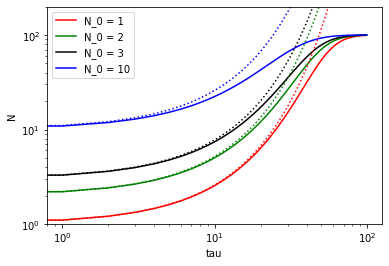

In [55]:
colors = ['red', 'green', 'black', 'blue']

# Plotting exact population dynamics
for i, row in enumerate(N):
    plt.loglog(row, c=colors[i], label=f'N_0 = {N_0[i]}')
    
# Plot linear stability analysis
for i, row in enumerate(Nlin):
    plt.loglog(row, c=colors[i], linestyle='dotted')

plt.ylim((1,200))
plt.ylabel('N')
plt.xlabel('tau')
plt.legend()
plt.show()

e)  Discuss how well the stability analysis approximates the exact dynamics.
How does the initial condition influence the approximation?

The stability analysis approximates the dynamics alright in the very beginning. However after several steps, around 10, the errors start compounding and exponentially deviate from the exact dynamics. For lower initial conditions $N_0$ the approximation works longer, but it still fails when $N \rightarrow N^*=100$.

In [68]:
# f) Approximation near stable steady state
dN0 = [-10, -3, -2, -1, 1, 2, 3, 10]
Nstar = 100
stable_slope = 1 - b*r/(1+r)
Ns = np.zeros((len(dN0), 100))
for i, N0 in enumerate(dN0):
    Ns[i, 0] = N0
    for t in range(tot_steps-1):
        Ns[i, t+1] = Ns[i,t]*stable_slope
Ns += Nstar

In [65]:
# Exact population dynamics
N_ex = np.zeros((len(dN0),tot_steps))
                
for i, N0 in enumerate(dN0):
    N_ex[i, 0] = N0 + Nstar
    for t in range(tot_steps-1):
        N_ex[i, t+1] = (r+1)*N_ex[i, t] / (1+(N_ex[i, t]/K)**b)

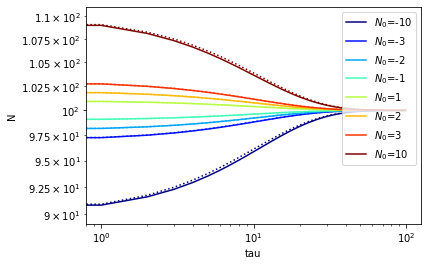

In [82]:
colors = cm.jet(np.linspace(0,1,len(dN0)))

for i, row in enumerate(Ns):
    plt.loglog(row, c=colors[i], linestyle='dotted')
    
for i, row in enumerate(N_ex):
    plt.loglog(row, c=colors[i], label=f'$N_0$={dN0[i]}')
    
plt.legend(loc='upper right')
plt.xlabel('tau')
plt.ylabel('N')
plt.show()